In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
# Load your data
data = pd.read_excel('B:\capstone project 2\city_temperature.xlsx')


In [3]:
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [4]:
data.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [5]:
data.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1048570,Middle East,Oman,NaN,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,NaN,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,NaN,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,NaN,Muscat,2,10,1999,-99.0
1048574,Middle East,Oman,NaN,Muscat,2,11,1999,-99.0


In [6]:
data.describe()

,State,Month,Day,Year,AvgTemperature
count,0.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,NaN,6.471169e+00,1.571776e+01,2.006108e+03,5.466785e+01
std,NaN,3.457360e+00,8.800891e+00,3.648453e+01,4.065817e+01
min,NaN,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,NaN,3.000000e+00,8.000000e+00,2.000000e+03,4.840000e+01
50%,NaN,6.000000e+00,1.600000e+01,2.007000e+03,6.450000e+01
75%,NaN,9.000000e+00,2.300000e+01,2.013000e+03,7.810000e+01
max,NaN,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1048575 non-null  object 
 1   Country         1048575 non-null  object 
 2   State           0 non-null        float64
 3   City            1048575 non-null  object 
 4   Month           1048575 non-null  int64  
 5   Day             1048575 non-null  int64  
 6   Year            1048575 non-null  int64  
 7   AvgTemperature  1048575 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB


In [8]:
data.isnull().sum()

Region                  0
Country                 0
State             1048575
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [9]:
data1=data.drop_duplicates()
data1

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
1048570,Middle East,Oman,NaN,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,NaN,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,NaN,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,NaN,Muscat,2,10,1999,-99.0


In [10]:
print("Column Names:", data.columns)

Column Names: Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')


In [11]:
data1

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
1048570,Middle East,Oman,NaN,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,NaN,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,NaN,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,NaN,Muscat,2,10,1999,-99.0


In [12]:
data1


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
1048570,Middle East,Oman,NaN,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,NaN,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,NaN,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,NaN,Muscat,2,10,1999,-99.0


In [14]:
# Optional: Remove outliers using the IQR method
Q1 = data1['AvgTemperature'].quantile(0.25)
Q3 = data1['AvgTemperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = data1[(data1['AvgTemperature'] >= lower_bound) & (data1['AvgTemperature'] <= upper_bound)]

In [15]:
df

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
1047071,Middle East,Lebanon,NaN,Beirut,5,13,2020,67.8
1047180,Middle East,Oman,NaN,Muscat,4,19,1995,82.8
1047338,Middle East,Oman,NaN,Muscat,9,24,1995,94.5
1047339,Middle East,Oman,NaN,Muscat,9,25,1995,92.6


In [16]:
# Filter the dataset for Chennai
chennai_df = df[df['City'] == 'Chennai (Madras)']

print(chennai_df.shape)

# Display the filtered data
print(chennai_df.head())

(9237, 8)
       Region Country  State              City  Month  Day  Year  \
331055   Asia   India    NaN  Chennai (Madras)      1    1  1995   
331056   Asia   India    NaN  Chennai (Madras)      1    2  1995   
331057   Asia   India    NaN  Chennai (Madras)      1    3  1995   
331058   Asia   India    NaN  Chennai (Madras)      1    4  1995   
331059   Asia   India    NaN  Chennai (Madras)      1    5  1995   

        AvgTemperature  
331055            72.4  
331056            73.5  
331057            72.6  
331058            75.2  
331059            74.8  


In [17]:
chennai_df.isnull().sum()

Region               0
Country              0
State             9237
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
dtype: int64

In [18]:
chennai_df['Date'] = pd.to_datetime(chennai_df[['Year', 'Month', 'Day']])
chennai_df.set_index('Date', inplace=True)
chennai_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_21800\4083458613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chennai_df['Date'] = pd.to_datetime(chennai_df[['Year', 'Month', 'Day']])


,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,Asia,India,NaN,Chennai (Madras),1,1,1995,72.4
1995-01-02,Asia,India,NaN,Chennai (Madras),1,2,1995,73.5
1995-01-03,Asia,India,NaN,Chennai (Madras),1,3,1995,72.6
1995-01-04,Asia,India,NaN,Chennai (Madras),1,4,1995,75.2
1995-01-05,Asia,India,NaN,Chennai (Madras),1,5,1995,74.8
...,...,...,...,...,...,...,...,...
2020-05-09,Asia,India,NaN,Chennai (Madras),5,9,2020,90.1
2020-05-10,Asia,India,NaN,Chennai (Madras),5,10,2020,89.4
2020-05-11,Asia,India,NaN,Chennai (Madras),5,11,2020,89.5


In [19]:
df1 = df.groupby('Region')['AvgTemperature'].sum().reset_index()
df1

,Region,AvgTemperature
0,Africa,16436948.5
1,Asia,20873966.1
2,Australia/South Pacific,3439724.6
3,Europe,19065364.0
4,Middle East,3032977.9


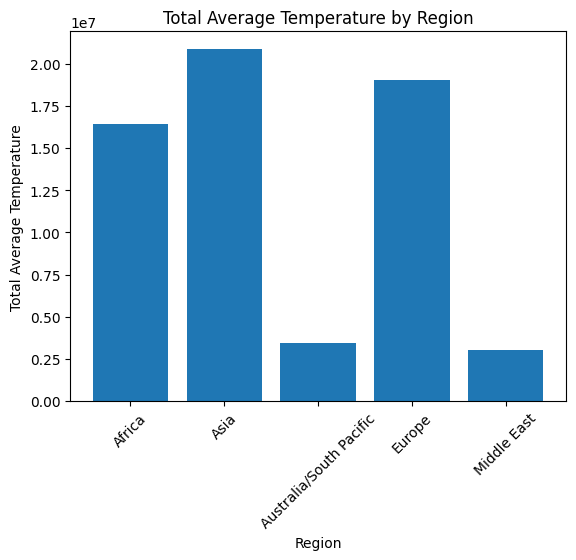

In [69]:
plt.bar(df1['Region'], df1['AvgTemperature'])
plt.xlabel('Region')
plt.ylabel('Total Average Temperature')
plt.title('Total Average Temperature by Region')
plt.xticks(rotation=45)
plt.show()

In [21]:
chennai_df1=chennai_df.drop(['Month','Day','Year','Region','Country','City'],axis=1)

In [31]:
chennai_df1

,AvgTemperature
Date,
1995-01-01,72.4
1995-01-02,73.5
1995-01-03,72.6
1995-01-04,75.2
1995-01-05,74.8
...,...
2020-05-09,90.1
2020-05-10,89.4
2020-05-11,89.5


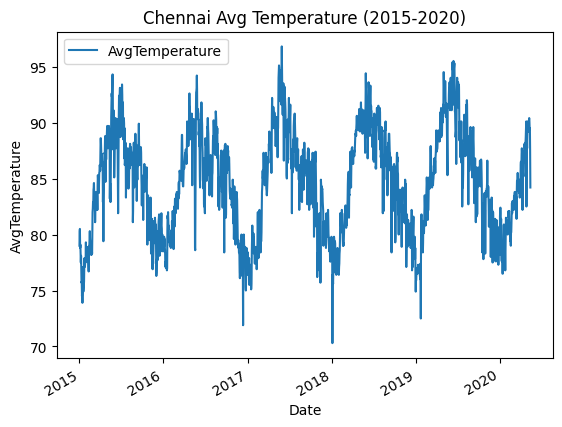

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data from 2015 to 2020
filtered_df = chennai_df1.loc['2015-01-01':'2020-05-13']

# Identify and remove unrealistic temperature values
filtered_df = filtered_df[(filtered_df['AvgTemperature'] > 0) & (filtered_df['AvgTemperature'] <= 120)]

# Plot the cleaned data
filtered_df['AvgTemperature'].plot()
plt.xlabel('Date')
plt.ylabel('AvgTemperature')
plt.title('Chennai Avg Temperature (2015-2020)')
plt.legend()
plt.show()

In [34]:
chennai_df1

,AvgTemperature
Date,
1995-01-01,72.4
1995-01-02,73.5
1995-01-03,72.6
1995-01-04,75.2
1995-01-05,74.8
...,...
2020-05-09,90.1
2020-05-10,89.4
2020-05-11,89.5


In [35]:
# Step 3: Check for Stationarity using Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(chennai_df1['AvgTemperature'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
if adf_result[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -7.121718639489838
p-value: 3.7077232069790386e-10
The time series is stationary (reject the null hypothesis).


In [36]:
# Step 4: Split Data into Train and Test Sets
train_size = int(0.8 * len(chennai_df1))
train_df = chennai_df1.iloc[:train_size]
test_df = chennai_df1.iloc[train_size:]

In [37]:
test_df

,AvgTemperature
Date,
2015-04-14,84.6
2015-04-15,79.4
2015-04-16,84.1
2015-04-17,84.4
2015-04-18,85.5
...,...
2020-05-09,90.1
2020-05-10,89.4
2020-05-11,89.5


In [38]:
train_df

,AvgTemperature
Date,
1995-01-01,72.4
1995-01-02,73.5
1995-01-03,72.6
1995-01-04,75.2
1995-01-05,74.8
...,...
2015-04-09,87.2
2015-04-10,86.1
2015-04-11,86.5


In [39]:
print(len(test_df))

1848


In [43]:
# Step 5: Build ARIMA Model
# If the series is differenced, use order (p, d, q) = (1, 1, 1) as an example
arima_model = ARIMA(train_df, order=(5, 1, 0))
arima_result = arima_model.fit()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [46]:
# Forecast using ARIMA
forecast_start = len(train_df)
forecast_end = len(train_df) + len(test_df) - 1
arima_forecast = arima_result.predict(start=forecast_start, end=forecast_end, dynamic=False)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [47]:
print(len(arima_forecast))
print(len(test_df))

1848
1848


In [48]:


# Step 7: Evaluation of Models
# ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
arima_mae = mean_absolute_error(test_df['AvgTemperature'], arima_forecast)
arima_mse = mean_squared_error(test_df['AvgTemperature'], arima_forecast)
arima_rmse = np.sqrt(arima_mse)
print(f"ARIMA - MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}")




ARIMA - MAE: 3.8923116321164164, MSE: 21.186700619106947, RMSE: 4.602901326240543


In [49]:
sarimax_model = SARIMAX(train_df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarimax_model.fit()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
# Forecast using SARIMAX
sarimax_forecast = sarimax_result.predict(start=len(train_df), end=len(train_df) + len(test_df) - 1)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [51]:
# SARIMAX
sarimax_mae = mean_absolute_error(test_df['AvgTemperature'], sarimax_forecast)
sarimax_mse = mean_squared_error(test_df['AvgTemperature'], sarimax_forecast)
sarimax_rmse = np.sqrt(sarimax_mse)
print(f"SARIMAX - MAE: {sarimax_mae}, MSE: {sarimax_mse}, RMSE: {sarimax_rmse}")

SARIMAX - MAE: 4.1002063844204475, MSE: 25.04793184313887, RMSE: 5.004790889052096


In [52]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(chennai_df1)

# Define sequence length and features
sequence_length = 10  # Number of time steps in each sequence
num_features = len(chennai_df1.columns)

# Create sequences and corresponding labels
sequences = []
labels = []
for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][0]  # '_tempm' column index
    sequences.append(seq)
    labels.append(label)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)

Train X shape: (7381, 10, 1)
Train Y shape: (7381,)
Test X shape: (1846, 10, 1)
Test Y shape: (1846,)


In [53]:
#LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=128, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,417 (501.63 KB)

 Trainable params: 128,417 (501.63 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights= True)
model_checkpoint=ModelCheckpoint('F:/ANN/ANN Project/cps project 2/best_weights.keras',monitor='val_loss',save_best_only=True)
# Train the model
history=model.fit(train_x, train_y, batch_size=64, epochs=100, validation_split=0.2, callbacks=[early_stopping,model_checkpoint])

Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0492 - val_loss: 0.0064
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0097 - val_loss: 0.0061
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0095 - val_loss: 0.0059
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0092 - val_loss: 0.0057
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0090 - val_loss: 0.0056
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0087 - val_loss: 0.0054
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 8/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0082 - val_loss: 0.0052
Epoch 9/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0075 - val_loss: 0.0052
Epoch 10/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0072 - val_loss: 0.0048
Epoch 11/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0071 - val_loss: 0.0043
Epoch 12/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/ste

In [56]:
import tensorflow as tf

In [58]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('F:/ANN/ANN Project/cps project 2/best_weights.keras')
test_loss = best_model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0031
Test Loss: 0.002946109278127551


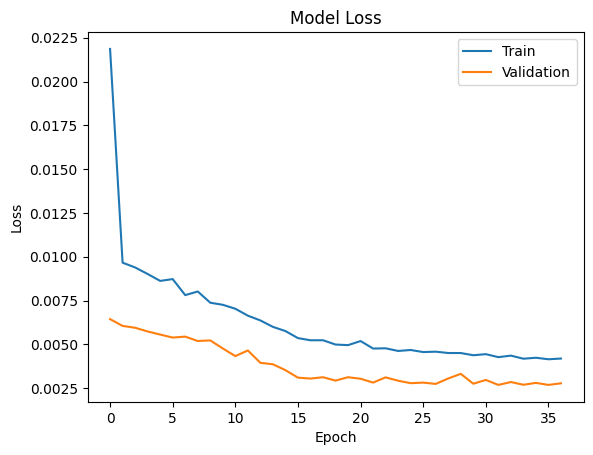

In [59]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Predict temperatures using the trained model
predictions = best_model.predict(test_x)

# Calculate evaluation metrics
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step
Mean Absolute Error (MAE): 0.03957665917377702
Mean Squared Error (MSE): 0.0029461091390847486
Root Mean Squared Error (RMSE): 0.05427807235969926


In [61]:
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(test_y, predictions)
print("R-squared (R²):", r2)

R-squared (R²): 0.8887072501692916


In [62]:
model.save("temperature_predictions_model.h5")

In [63]:
print(predictions)

[[0.43673143]
 [0.5077865 ]
 [0.53036404]
 ...
 [0.6955532 ]
 [0.6983923 ]
 [0.64891183]]


In [65]:
import numpy as np

# Get the last available sequence from the scaled data
last_sequence = scaled_data[-sequence_length:]

# Define how many days into the future you want to predict
future_days = 30

# List to store predictions
future_predictions = []

# Loop to predict the next 'future_days' temperatures
for _ in range(future_days):
    # Predict the next temperature
    next_prediction = model.predict(last_sequence[np.newaxis, :, :])[0, 0]
    
    # Append the prediction to the list
    future_predictions.append(next_prediction)
    
    # Update the sequence: remove the oldest entry and add the new prediction
    next_entry = np.zeros((1, num_features))
    next_entry[0, 0] = next_prediction
    last_sequence = np.vstack((last_sequence[1:], next_entry))

# Convert the predictions back to the original scale
future_predictions_scaled = np.array(future_predictions).reshape(-1, 1)
future_predictions_full = np.repeat(future_predictions_scaled, num_features, axis=1)
predicted_temperatures = scaler.inverse_transform(future_predictions_full)[:, 0]

print("Predicted Temperatures for the Next 10 Days:", predicted_temperatures)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━